## Machine Learning 

Traing the machine to think and decide 

#  Reggressions 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from  plotly.offline import plot , iplot , download_plotlyjs , init_notebook_mode
import cufflinks as cf
cf.go_offline()
;

''

In [2]:
df=pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe(include='all')

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5000
top,NaN,NaN,NaN,NaN,NaN,NaN,"4277 Katherine Tunnel Suite 986\nHallview, LA ..."
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,NaN
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,NaN
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,NaN
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,NaN


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

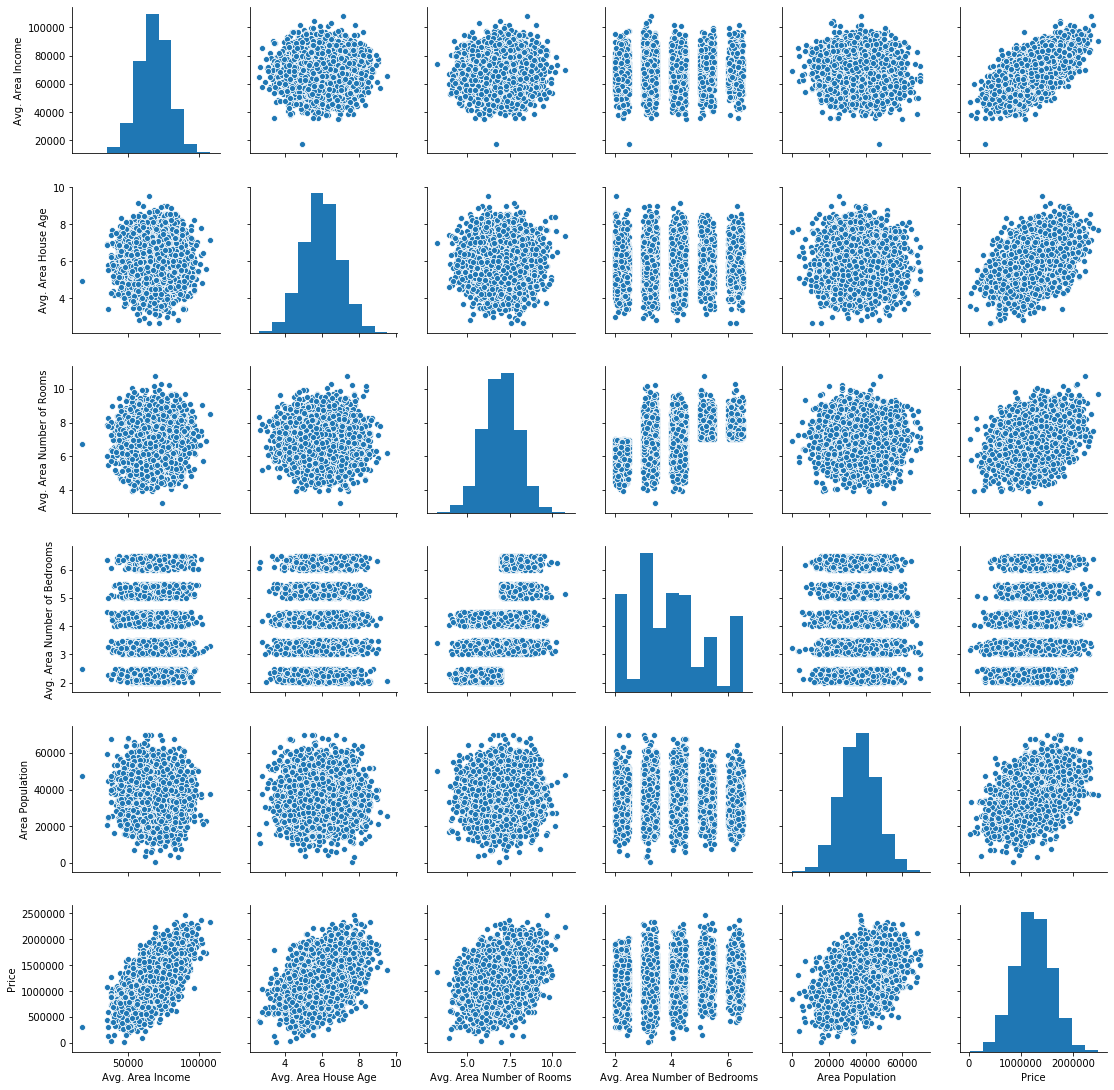

In [7]:
sns.pairplot(df)

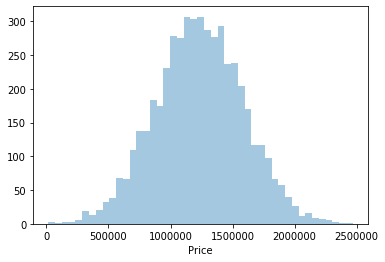

In [8]:
sns.distplot(df['Price'],kde=False)

In [9]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


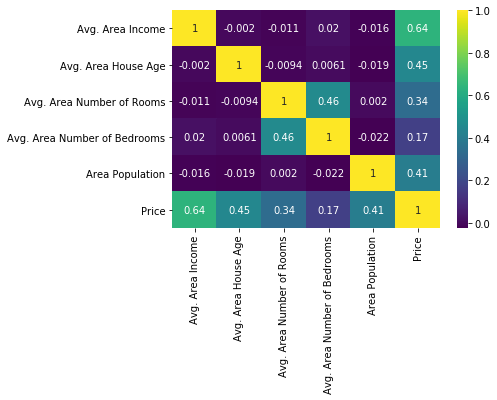

In [10]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [11]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 

In [14]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4576,76027.944929,5.744456,8.032014,4.23,37462.222834
1088,60945.721799,4.781651,5.628335,3.08,34162.956731
479,71392.473885,3.997533,7.839552,4.26,36009.700337
727,69200.664269,5.609022,6.571302,4.28,31085.323040
3783,66631.108857,6.772022,6.923705,4.47,61361.730477
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lm.coef_

array([2.15704132e+01, 1.66552478e+05, 1.19512534e+05, 2.75895188e+03,
       1.52968610e+01])

In [19]:
report=pd.DataFrame(lm.coef_,X_train.columns,columns=["Coeff"])

### lm.coef_ will give you the Coefficients Which means
#### if All other units kept fixed Increase in 1 UNIT of Area or Income cause Increase of  21.570413 increase in Price 

In [20]:
report

,Coeff
Avg. Area Income,21.570413
Avg. Area House Age,166552.477670
Avg. Area Number of Rooms,119512.534382
Avg. Area Number of Bedrooms,2758.951878
Area Population,15.296861


## R Sqaured (Score)

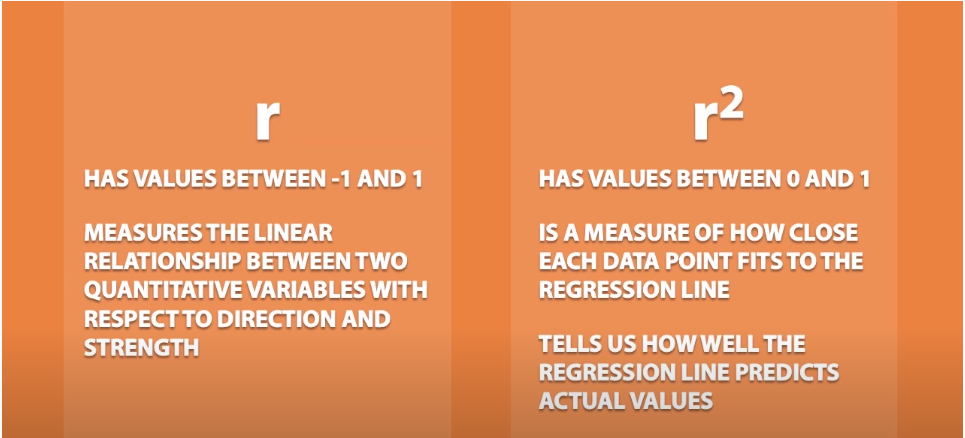

### Training Set

In [21]:
lm.score(X_train,y_train)

0.918939846901015

### Test Set

In [22]:
lm.score(X_test,y_test)

0.916450201435024

### R ^2 is the percentage of Variation in Y that is accounted for by its Regression on X

**Apply Simple Model and Then complex (Polynomial of degree 2 3 4 e.t.c) if it improves the R Squared to much extent then go for it otherwise stick to the simpler one to avoid OVERFITTING** 

## Prediction 

In [23]:
pred=lm.predict(X_test)

In [24]:
pred             #These are the Prdicted Values 

array([1311074.59195061, 1239575.7569346 , 1243916.25450742, ...,
        840825.86587512, 1050491.02276031,  946720.46738516])

In [25]:
y_test           # These are the Origional Values 

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
331     9.967712e+05
3100    1.146480e+06
1454    7.769063e+05
342     1.123851e+06
3209    9.870041e+05
Name: Price, Length: 2000, dtype: float64

### Lets have Look on Both Pred vs y_test (Origional values)

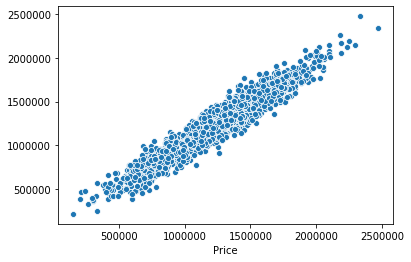

In [26]:
sns.scatterplot(y_test,pred)

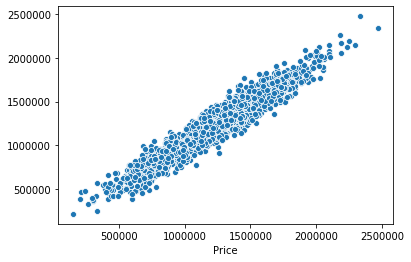

In [27]:
sns.scatterplot(y_test,pred)

### Creating Histograme of Residuals 

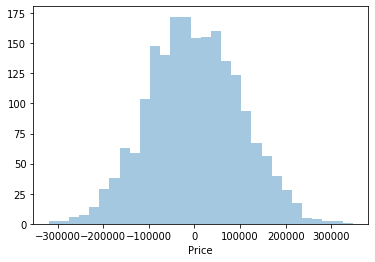

In [28]:
## Checking the Dsitribution of residuals 
sns.distplot(y_test-pred,kde=False,bins=30)

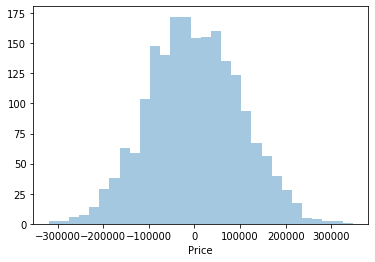

In [29]:
sns.distplot(y_test-pred,kde=False,bins=30)

### THESE PLOTS Are USEFUL TO VISUALISE RELATION BW 2 VAR.

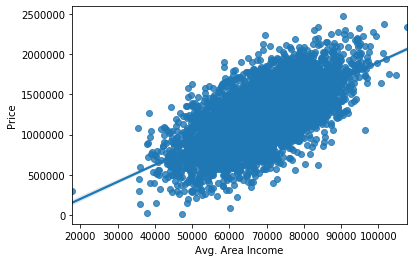

In [30]:
sns.regplot(df['Avg. Area Income'],y=df['Price']) 

# Regeression Evaluation Matrix

In [31]:
from sklearn import metrics

In [32]:
metrics.mean_absolute_error(y_test,pred)

81331.22699573654

In [33]:
metrics.mean_squared_error(y_test,pred)

10119734875.653337

In [34]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

100596.89297216559

# StandardScaler

#### Improves the performance 

**Now lets Just Standarized the Data and Then Check the accuracy**

**Normalization or Standarization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values**
Data standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss=StandardScaler()

In [37]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [38]:
ss.fit(df.drop(["Price",'Address'],axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
scaled_data=ss.transform(df.drop(["Price",'Address'],axis=1))

In [40]:
scaled_data

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [41]:
df2=pd.DataFrame(scaled_data,columns=(df.drop(["Price",'Address'],axis=1).columns))

In [42]:
X=df2
y=df['Price']

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
lm=LinearRegression()

In [47]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
pred=lm.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
print(mean_squared_error(y_test,pred))

10013679978.582754


#### Accuracy Increased in both Classification and Regression Problems

# Logistic Regression 

### For binary Classification (Supervised ML)

###### We cant fit linear regression to it 
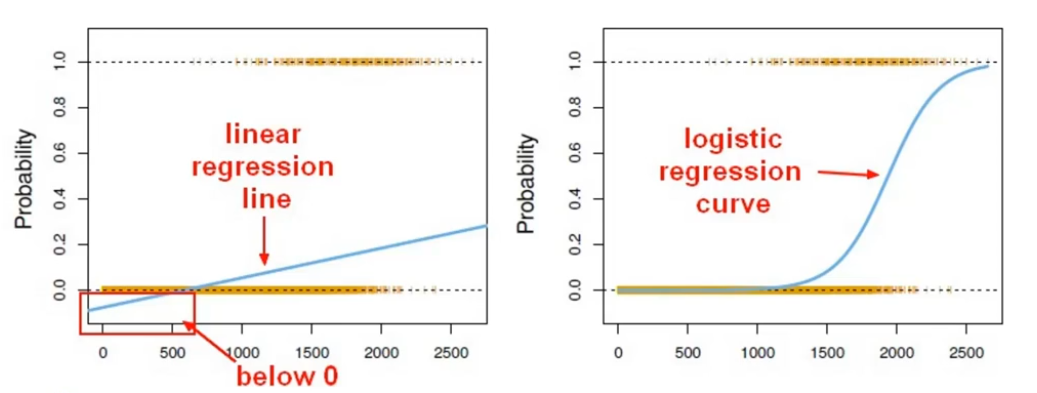

##### Sigmoid function is the essence of Log Reg to predict the probability of an event  ( which always  gives the value bw 0 and 1 )

###### Below 0.5 its class 0 and above 0.5 its class 1

### Confusion Matrix is Used to Evaluate Classification Problems 
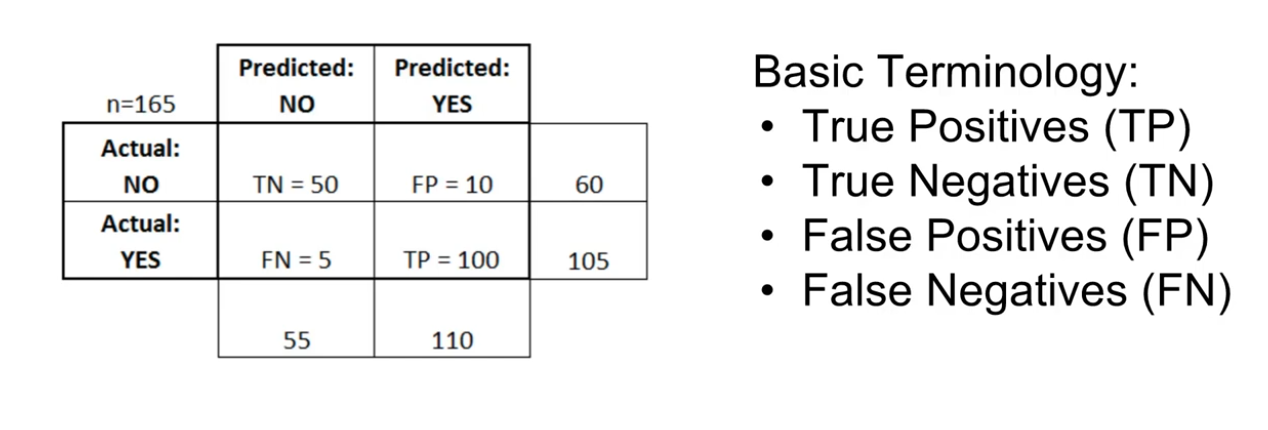

* Accuracy=(TP+TN)/total
* Misclassification Rate = (Error1+Error2)/total 
* Error1= False Postive 
* Error2= False Negative 

In [51]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Standard Deviation gives you the Dispersion of Data around the Mean
for example Men have Low standard Deviation in the Hair Lenghth as compared to the women**

In [53]:
np.std(df['Fare'])

49.66553444477411

In [54]:
np.var(df['Fare'])

2466.6653116850434

In [55]:
df['Fare'].max()

512.3292

In [56]:
df['Fare'].min()

0.0

In [57]:
df['Fare'].mean()

32.2042079685746

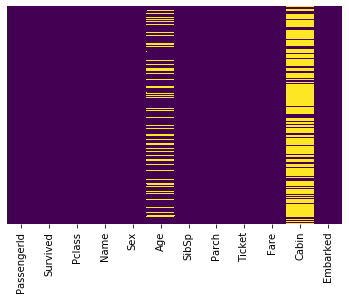

In [58]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

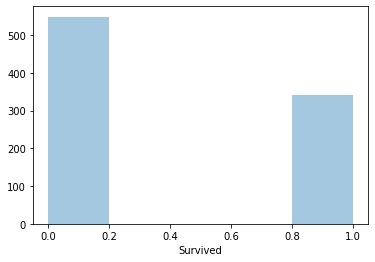

In [59]:
sns.distplot(df['Survived'],kde=False)

In [60]:
sns.set_style("whitegrid")

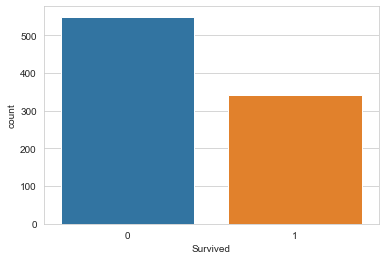

In [61]:
sns.countplot(df['Survived'])

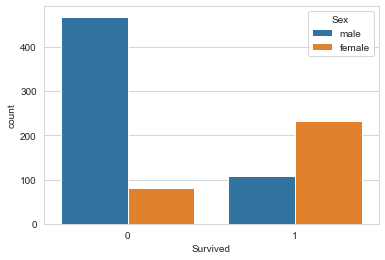

In [62]:
sns.countplot(x='Survived',hue='Sex',data=df)

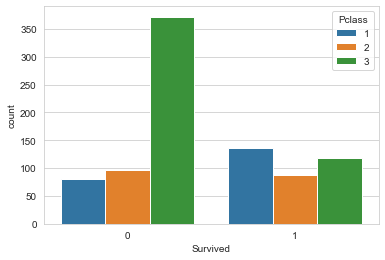

In [63]:
sns.countplot(x='Survived',hue='Pclass',data=df)

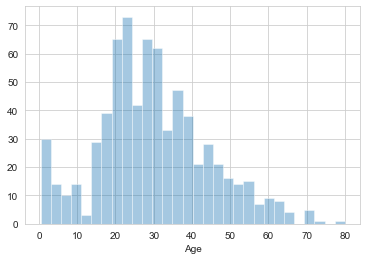

In [64]:
sns.distplot(df['Age'],kde=False,bins=30)

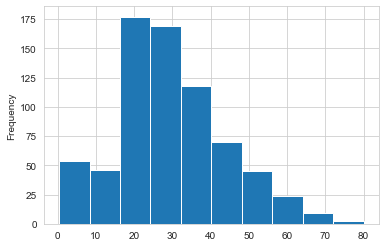

In [65]:
df['Age'].plot.hist()

In [66]:
cf.go_offline()
df['Age'].iplot(kind='hist')

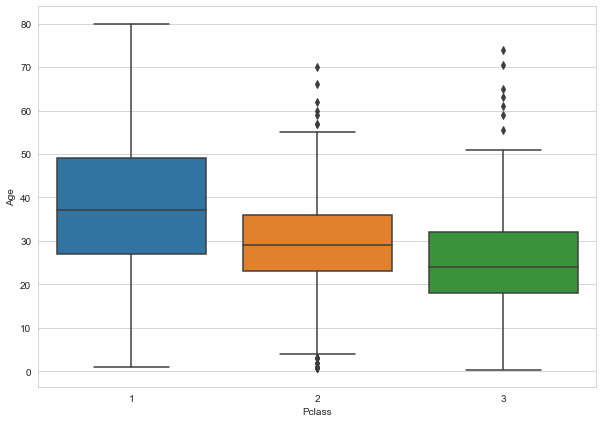

In [67]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)

##### Lets Fill out the Age  null Value Through Imputation 

**Check the Relationship of Age with other columns 
  But only catagorical Columns we have for imputation is PClass**

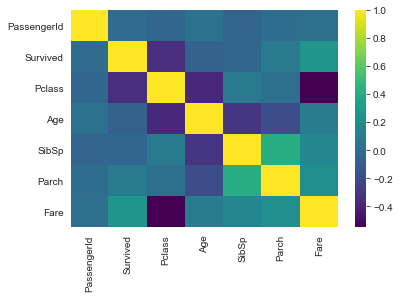

In [68]:
sns.heatmap(df.corr(),cmap='viridis')

In [69]:
### First Way with Inlace is Equal to True 
df[df["Pclass"]==1]['Age'].fillna(value=37)

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

In [70]:
def impute(Cols):
    Age=Cols[0]
    Pclass=Cols[1]
    if pd.isnull(Age):
        
       if Pclass==1:
        return 37
       elif Pclass==2:
            return 29
       else:
        return 24
    else:
       return Age

In [71]:
df["Age"]=df[['Age','Pclass']].apply(impute,axis=1)

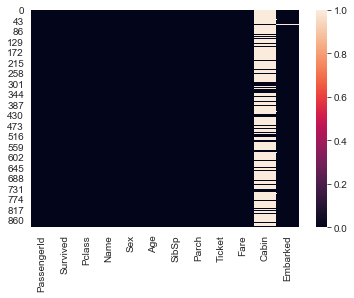

In [72]:
sns.heatmap(df.isnull())

In [73]:
df.drop('Cabin',axis=1,inplace=True)

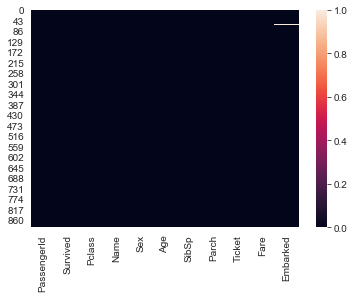

In [74]:
sns.heatmap(df.isnull())

In [75]:
df.dropna(inplace=True)

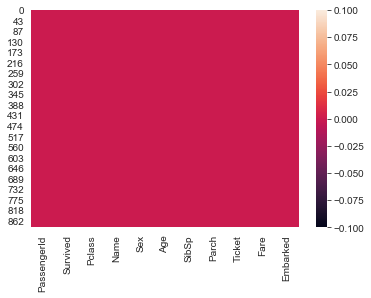

In [76]:
sns.heatmap(df.isnull())

In [77]:
x=pd.get_dummies(df['Sex'],drop_first=True)
y=pd.get_dummies(df['Embarked'],drop_first=True)

In [78]:
pd.concat([df,x,y],axis=1) ### Very Important AXIS EQUALS TO 1 TO ADD COLUMNS

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [79]:
df.drop(['Ticket','Sex','Embarked','Name'],axis=1,inplace=True)

In [80]:
df.drop('PassengerId',axis=1,inplace=True)

In [81]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [82]:
X=df.drop("Survived",axis=1)
y=df['Survived']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.3, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lg=LogisticRegression()

In [87]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
pre=lg.predict(X_test)

In [89]:
from sklearn.metrics import classification_report


In [90]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       167
           1       0.68      0.49      0.57       100

    accuracy                           0.72       267
   macro avg       0.71      0.68      0.68       267
weighted avg       0.72      0.72      0.71       267



In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
values=confusion_matrix(y_test,pre)
print(values)
print("True Postive /t True Negative")

[[144  23]
 [ 51  49]]
True Postive /t True Negative


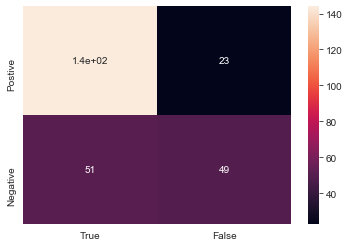

In [93]:
sns.heatmap(values,annot=True,xticklabels=['True','False'],yticklabels=['Postive','Negative'])

**Confusion Matrix gives you the True Postive True Negative
False Positive and False Negative**
* Accuracy=True Postive/Total Values 
e.g we have 1000 patients 10 Infected a 990 Healthy
our system detects all s Healthy
accuracy is 99.99% Which is Rubbish 
Thats why we take in care of Precision and Recalls
But it depends upon the Situation either we will considere Precision or Recall
or both in the form of F1 Score
* Precision = TP/TP+FP
we give importance to FP in precison where the loss is bearable like Classifying  Client as he will Pay the Loan or Not
* Recall = TP/TP+FN  
we give importace to false negative where we cant bear the loss of Patient infected but we neglected it 

## Imputer


In [94]:
from sklearn.impute import SimpleImputer
SM=SimpleImputer(strategy="mean")

In [95]:
clean_data=pd.DataFrame(SM.fit_transform([df['Age']]))

In [96]:
clean_data

,0,1,2,3,4,5,6,7,8,9,...,879,880,881,882,883,884,885,886,887,888
0,22.0,38.0,26.0,35.0,35.0,24.0,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,24.0,26.0,32.0
